In [2]:
# Assistant
# data import and visualization
import sys, os, math, time  # Importing standard libraries for system operations, mathematical functions, time handling, and more
import matplotlib.pyplot as plt  # Importing pyplot from matplotlib for data visualization
from numpy import *  # Importing all functions from numpy for numerical operations

# Defining a list of tuples representing coordinates in a 2D space
xdim = [(-0.1, -0.2), (0.5, 0.5), (-0.5, 0.2), (-0.25, 0.5), (0.2, 0.1), (0, 0.8)]

# Defining a list of labels or categories corresponding to the coordinates in xdim
ldim = [-1, 1, -1, -1, 1, 1]

In [4]:
# Assistant
# Importing necessary libraries for the Perceptron algorithm
import numpy as np  # Importing numpy for numerical operations

# Defining the Perceptron class
class Perceptron:
    def __init__(self, learning_rate):
        # Initializing the learning rate and number of iterations
        self.learning_rate = learning_rate  # Learning rate for weight updates
        self.weights = None  # Placeholder for weights
        self.bias = None  # Placeholder for bias

    def fit(self, X, y):
        # Fitting the model to the training data
        n_samples, n_features = X.shape  # Getting the number of samples and features
        self.weights = np.zeros(n_features)  # Initializing weights to zero
        self.bias = 0  # Initializing bias to zero
        counter = 0
        prebias = self.bias
        # Training the model for a specified number of iterations
        while(True):
            counter+=1
            prebias = self.bias
            for idx, x_i in enumerate(X):
                # Calculating the linear output
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Applying the step function to determine the predicted class

                if (-y[idx]*linear_output >=0):
                    # Updating weights and bias if there is a misclassification
                    update = self.learning_rate * (y[idx])
                    self.weights += update * x_i  # Updating weights
                    self.bias += update  # Updating bias
               # print(self.bias)
            if(prebias == self.bias):
                break
        print(self.weights, self.bias,counter)
    def predict(self, X):
        # Making predictions on new data
        linear_output = np.dot(X, self.weights) + self.bias  # Calculating linear output
        return np.where(linear_output >= 0, 1, -1)  # Returning predicted classes

    def show(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Visualizes the classification results of the Perceptron algorithm.
    
        Args:
            X (np.ndarray): The input features, shape (n_samples, n_features).
            y (np.ndarray): The true labels, shape (n_samples,).
        """
        # Generate points for the decision boundary
        x_values = np.linspace(-1, 1, 10)
        decision_boundary = -(self.weights[0] * x_values + self.bias) / self.weights[1]
    
        # Plot the decision boundary
        plt.plot(x_values, decision_boundary, label='Decision Boundary')
    
        # Plot each point in the dataset
        for point, label in zip(X, y):
            marker = 'o' if label == 1 else '+'
            color = 'blue' if label == 1 else 'red'
            plt.scatter(point[0], point[1], marker=marker, color=color, s=100)
            plt.text(point[0] + 0.05, point[1], f'({point[0]:.1f}, {point[1]:.1f})')
    
        # Set plot limits and labels
        #plt.axis([-0.8, 0.8, -0.25, 1])
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title('Perceptron Algorithm for Classification')
        plt.grid(True)
        plt.legend()
        plt.show()


[0.00735 0.0021 ] 0.0 1


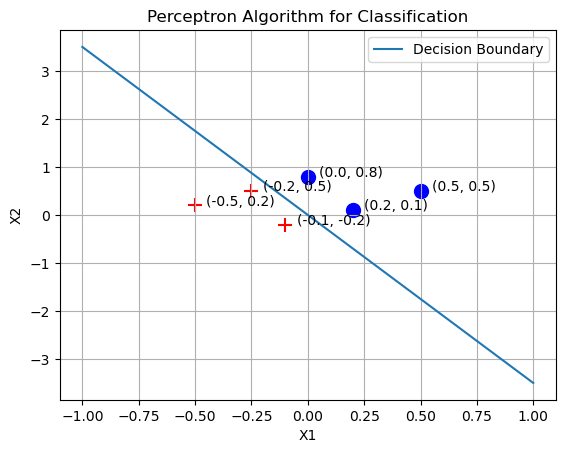

Predictions: [-1  1 -1 -1  1  1]


In [18]:
import numpy as np  # Make sure to import numpy

# Assuming xdim and ldim are defined somewhere in your code
# Check if xdim and ldim are defined and not empty
if 'xdim' in locals() and 'ldim' in locals() and len(xdim) > 0 and len(ldim) > 0:
    X = np.array(xdim)  # Converting xdim to a numpy array for processing
    y = np.array(ldim)  # Converting ldim to a numpy array for processing
else:
    raise ValueError("xdim and ldim must be defined and not empty.")

# Creating an instance of the Perceptron class
perceptron = Perceptron(learning_rate=0.007)

# Fitting the Perceptron model to the training data
perceptron.fit(X, y)

# Making predictions on the training data
predictions = perceptron.predict(X)

perceptron.show(X,y)
# Printing the predictions
print("Predictions:", predictions)

**对于不同的学习速率，结果收敛的次数基本一致**